## Exercise 2.5 - Non Stationarity for epsilon = 0.1, for both sample averages incremented independently and alpha = 0.1 ##

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 10000

#probability of random exploration(fraction)
epsilon = 0.1

#number of bandits(episodes)
bandit_number = 2000

#current value estimate of action
Q = np.zeros((bandit_number,n)) 

#number of times an action was chosen for each bandit
increments = []
N = np.zeros((bandit_number,n)) 
alpha = 0.1
increments = [N,alpha]

#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n)) 

#initial same values to all the arms
#init_value = np.random.normal(loc = 0, scale = 1)
#Q_star = np.asarray([[init_value for column in range(n)] for row in range(bandit_number)])
#Q_star = np.random.normal(loc=0,scale=1,size=(bandit_number,n))

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(increments),t)))


opt_act = np.asmatrix(np.zeros((len(increments),t)))

#function Bandit taking action and bandit as input, returning reward.
def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

In [27]:
#%%A simple bandit algorithm
for k in range(len(increments)):
    
    Q = np.zeros((bandit_number,n))
    increments[0] = np.zeros((bandit_number,n))
    #N = np.zeros((bandit_number,n))
    init_value = np.random.normal(loc = 0, scale = 1)
    Q_star = np.asarray([[init_value for column in range(n)] for row in range(bandit_number)])

    for episode in range(1, t):
        local_reward = 0.0
        action_history = 0.0
        upper_rewards = 0.0
        for machine in range(1,bandit_number):
            p = np.random.rand()  
            if p <= epsilon:      
                a =  np.random.randint(1,high=n)
            else:
                a = np.argmax(Q[machine,:])

            #reward for choosing an action a for corresponding machine
            rewards = bandit(a,machine) 
            
            #update number of times action was chosen
            if (k == 0):
                increments[k][machine,a] += 1
                Q[machine,a] = Q[machine,a] + (1/increments[k][machine,a])*(rewards-Q[machine,a])
            else :
                Q[machine,a] = Q[machine,a] + (increments[k])*(rewards-Q[machine,a])
                
            #adding the local rewards
            local_reward += rewards
            
            
            #calculating an optimal action for each bandit
            idx = np.argmax(Q_star[machine,:])
            action_history += (a==idx)

        #update Q_star value with a noise 
        Q_star += np.random.normal(loc= 0, scale = 0.01, size = (bandit_number,n))
        

        avg_reward[k,episode] = (local_reward/bandit_number)
        opt_act[k,episode]= (action_history/bandit_number)                

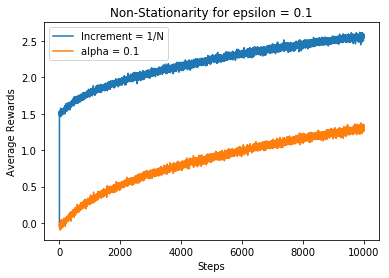

In [28]:
#%%plot graphs for average rewards
for reward in range(len(increments)):
    if reward == 0:
        plt.plot(avg_reward[reward,:].T,label = 'Increment = 1/N')
    else:
        plt.plot(avg_reward[reward,:].T,label = 'alpha = 0.1')
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.legend()
    plt.title('Non-Stationarity for epsilon = 0.1')

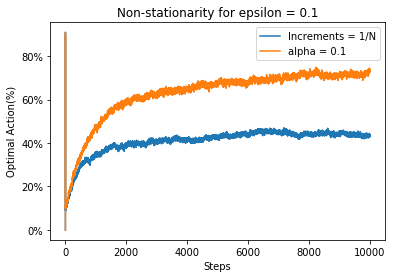

In [29]:
#%%plot graph of percentage of chossing optimal actions
for reward1 in range(len(increments)):
    if reward1 == 0:
        ax = plt.plot(100*opt_act[reward1,:].T,label='Increments = 1/N')
    else:
        ax = plt.plot(100*opt_act[reward1,:].T,label = 'alpha = 0.1')
    plt.xlabel('Steps')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
    plt.title(' for Epsilon = 0.1')
    plt.ylabel('Optimal Action(%)')
    plt.title('Non-stationarity for epsilon = 0.1')
    plt.legend()